In [26]:
import os
from glob import glob

# 1. Where are we right now?
print("Working directory:", os.getcwd())
print("Contents:", os.listdir(os.getcwd()))

# 2. Does 'cubicasa5k' live here?
print("'cubicasa5k' exists here? →", os.path.isdir("cubicasa5k"))

# 3. If it does, what subfolders are in it?
if os.path.isdir("cubicasa5k"):
    print("cubicasa5k contains:", os.listdir("cubicasa5k"))
else:
    print("No cubicasa5k folder in this directory!")


Working directory: /Users/omkar/Desktop/AI_Industry/Exercises/Manufacturing:Construction
Contents: ['ai_manufacturing_week1_code.ipynb', '.DS_Store', 'manufacturing_week1_slides.pdf', 'FloorPlan_Analysis.ipynb', 'construction-exercise-code.ipynb', 'cubicasa5k', 'path_to_folder', 'manufacturing_week2_slides.pdf', 'Construction-Exercise.pdf']
'cubicasa5k' exists here? → True
cubicasa5k contains: ['.DS_Store', 'high_quality', 'train.txt', 'colorful', 'test.txt', 'val.txt', 'high_quality_architectural']


→ Does it exist? True
→ Top-level contents: ['.DS_Store', 'high_quality', 'train.txt', 'colorful', 'test.txt', 'val.txt', 'high_quality_architectural']
→ Found 12342 PNGs; showing first 5 paths: ['cubicasa5k/high_quality/3954/F1_scaled.png', 'cubicasa5k/high_quality/3954/F1_original.png', 'cubicasa5k/high_quality/11940/F1_scaled.png', 'cubicasa5k/high_quality/11940/F1_original.png', 'cubicasa5k/high_quality/8322/F1_scaled.png']


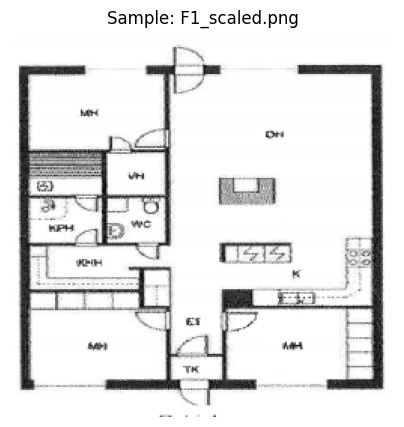

In [ ]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt

# 1. Make sure your dataset folder is where you think it is:
input_dir = 'cubicasa5k'
# 2. Recursively find any PNGs (not just F1_original)
all_images = glob(os.path.join(input_dir, "**", "*.png"), recursive=True)
print(f"→ Found {len(all_images)} PNGs; showing first 5 paths:", all_images[:5])

# 3. Load & display the very first one
if not all_images:
    raise RuntimeError("No images found—you probably need to point to a different directory.")
    
sample = all_images[0]
img   = cv2.imread(sample, cv2.IMREAD_GRAYSCALE)
img_r = cv2.resize(img, (256, 256))

plt.figure(figsize=(5,5))
plt.title(f"Sample: {os.path.basename(sample)}")
plt.imshow(img_r, cmap="gray")
plt.axis("off")
plt.show()


In [30]:
import os
import shutil
from glob import glob

src_dir = "cubicasa5k/high_quality"
dst_train = "data/train"
dst_test = "data/test"

os.makedirs(dst_train, exist_ok=True)
os.makedirs(dst_test, exist_ok=True)

all_images = sorted(glob(os.path.join(src_dir, "*", "F1_scaled.png")))
split_idx = int(len(all_images) * 0.9)
train_images = all_images[:split_idx]
test_images = all_images[split_idx:]

# Helper to copy with unique name
def copy_images(image_list, destination):
    for i, path in enumerate(image_list):
        new_name = f"F1_scaled_{i:04d}.png"
        shutil.copy(path, os.path.join(destination, new_name))

copy_images(train_images, dst_train)
copy_images(test_images, dst_test)

print(f"Train: {len(train_images)}, Test: {len(test_images)}")



Train: 892, Test: 100


In [31]:
# Define paths
train_dir = "data/train"
test_dir = "data/test"
train_target = os.path.join(train_dir, "floorplans")
test_target = os.path.join(test_dir, "floorplans")

# Create subfolders
os.makedirs(train_target, exist_ok=True)
os.makedirs(test_target, exist_ok=True)

# Move train images
for img_path in glob(os.path.join(train_dir, "*.png")):
    shutil.move(img_path, os.path.join(train_target, os.path.basename(img_path)))

# Move test images
for img_path in glob(os.path.join(test_dir, "*.png")):
    shutil.move(img_path, os.path.join(test_target, os.path.basename(img_path)))

print("Images moved into 'floorplans' class folder.")


Images moved into 'floorplans' class folder.


In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilmohammed/floor-plan-images-and-their-details")

# Unzip the downloaded dataset